In [ ]:
#Reading the dataset
import pandas as pd

#Load the titanic dataset
titanic_df=pd.read_csv('titanic.csv')

#Display the structure of the dataset
titanic_df.info()

#Print the dataset
print(titanic_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                           

**Checking for discrepancies in the dataset**

In [ ]:
#Checking for discrepancies in the data types
print(titanic_df[['Fare','Parch','Survived','PassengerId']].dtypes)

#Modifying data types if necessary -For example as folows:
titanic_df=titanic_df.dropna()
titanic_df['Fare']=titanic_df['Fare'].astype(int)
titanic_df['Parch']=titanic_df['Parch'].astype(int)

Fare           int64
Parch          int64
Survived       int64
PassengerId    int64
dtype: object


**Calculate mean,median,standard deviation, and quartiles**

In [ ]:
#Calculate mean,median,standard deviation,and quartiles
stats=titanic_df[['Fare','Parch','Survived','PassengerId','Age','SibSp']].agg(['mean','median','std','min','max','quantile'])

stats.loc['1st_quartile']=titanic_df[['Fare','Parch','Survived','PassengerId','Age','SibSp']].quantile(0.25)
stats.loc['3rd_quartile']=titanic_df[['Fare','Parch','Survived','PassengerId','Age','SibSp']].quantile(0.75)
stats.loc['2st_quartile']=titanic_df[['Fare','Parch','Survived','PassengerId','Age','SibSp']].quantile(0.50)
stats.loc['4rd_quartile']=titanic_df[['Fare','Parch','Survived','PassengerId','Age','SibSp']].quantile(1)

#Printing the stats
print(stats)

                    Fare     Parch  Survived  PassengerId        Age     SibSp
mean           97.666667  0.482759  0.505747  1102.712644  39.247126  0.597701
median         71.000000  0.000000  1.000000  1094.000000  39.000000  1.000000
std            88.165894  0.860801  0.502865   126.751901  15.218730  0.637214
min             0.000000  0.000000  0.000000   904.000000   1.000000  0.000000
max           512.000000  4.000000  1.000000  1306.000000  76.000000  3.000000
quantile       71.000000  0.000000  1.000000  1094.000000  39.000000  1.000000
1st_quartile   35.000000  0.000000  0.000000   986.000000  27.000000  0.000000
3rd_quartile  134.500000  1.000000  1.000000  1216.000000  50.000000  1.000000
2st_quartile   71.000000  0.000000  1.000000  1094.000000  39.000000  1.000000
4rd_quartile  512.000000  4.000000  1.000000  1306.000000  76.000000  3.000000


**Finding the mode of class variables**

In [ ]:
#Finding the mode for class variables expect PassengerID
mode_values=titanic_df[['Pclass','Sex','Embarked']].mode()
print(mode_values)

   Pclass     Sex Embarked
0       1  female        C


In [ ]:
mode_values1=titanic_df[['Pclass']].mode()
print(mode_values1)

   Pclass
0       1


In [ ]:
mode_values2=titanic_df[['Embarked']].mode()
print(mode_values2)

  Embarked
0        C


**Creating Histograms and Analyzing Distributions**

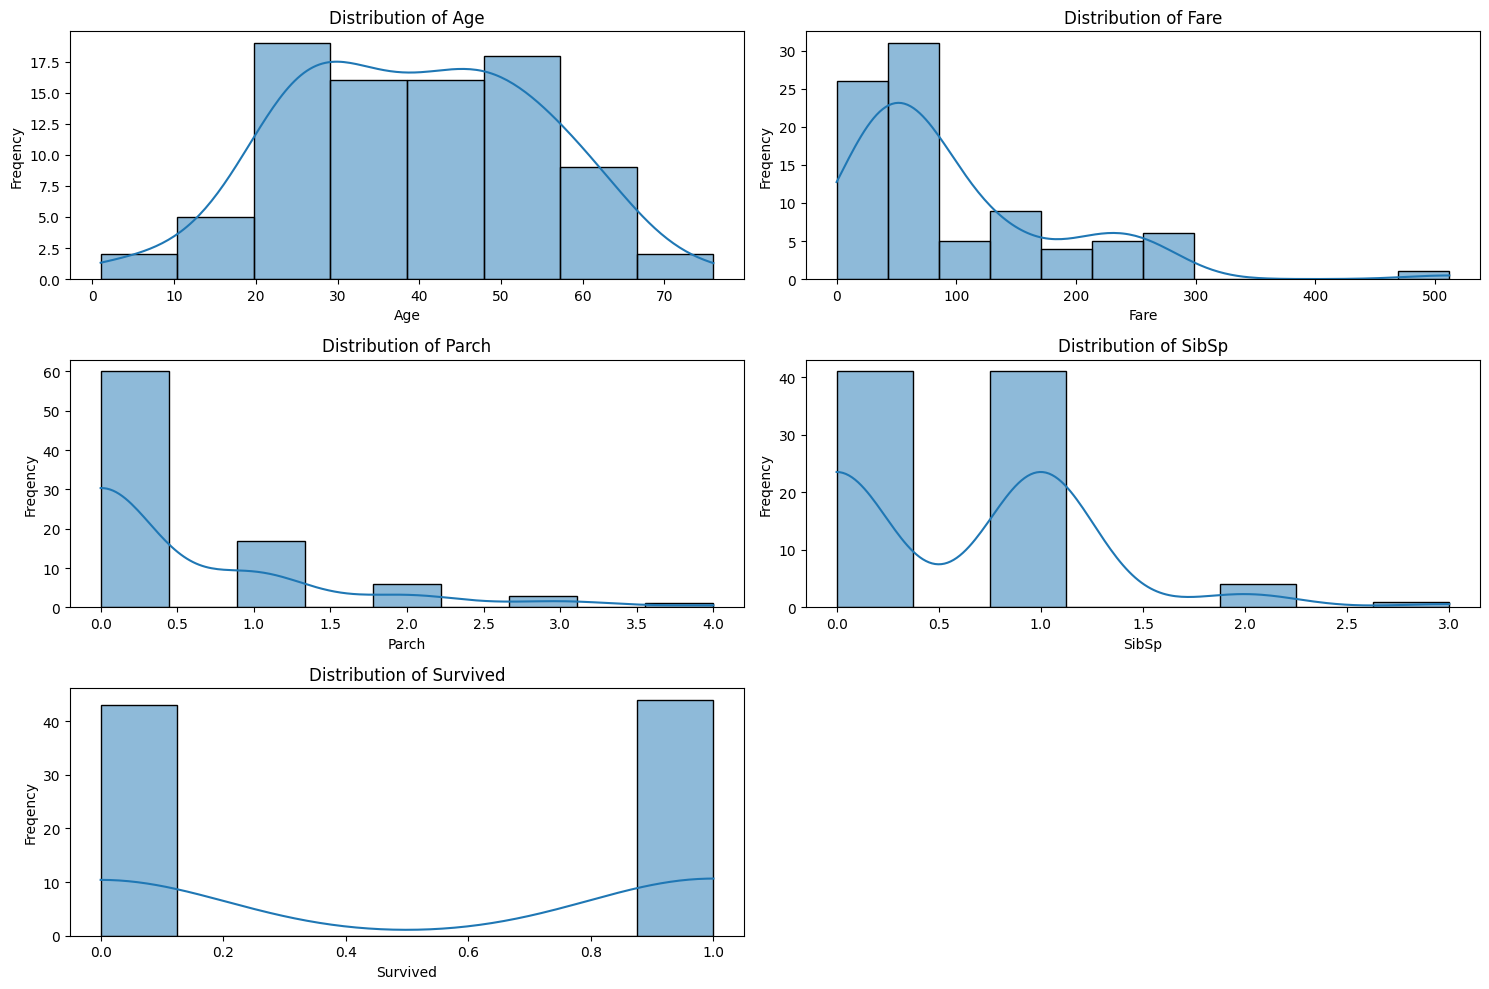

In [ ]:
#Creating Histograms and Analyzing Distributions

import matplotlib.pyplot as plt
import seaborn as sns

#Plotting histograms for Age,Fare,Parch,SibSp, and Survied
variables=['Age','Fare','Parch','SibSp','Survived']

plt.figure(figsize=(15,10))
for i,var in enumerate(variables,1):
  plt.subplot(3,2,i)
  sns.histplot(titanic_df[var].dropna(),kde=True)
  plt.title(f'Distribution of {var}')
  plt.xlabel(var)
  plt.ylabel('Freqency')

plt.tight_layout()
plt.show()

**Types of Discrete Distribution**

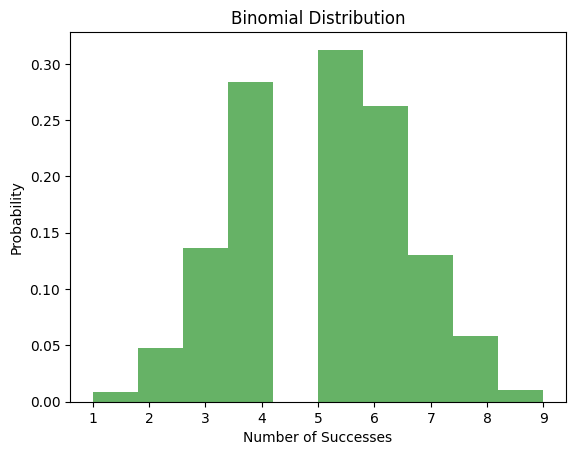

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Parameters: n=number of trials,p=probability of success
n,p=10,0.5
data=np.random.binomial(n,p,1000)

plt.hist(data,bins=10,density=True,alpha=0.6,color='g')
plt.title('Binomial Distribution')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.show()

**Poisson Distribution**

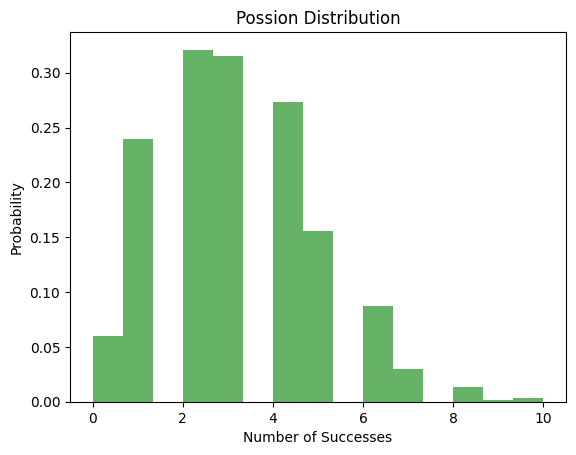

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Parameters: n=number of trials,p=probability of success
lam=3
data=np.random.poisson(lam,1000)

plt.hist(data,bins=15,density=True,alpha=0.6,color='g')
plt.title('Possion Distribution')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.show()

**Hypergeometric Plot**

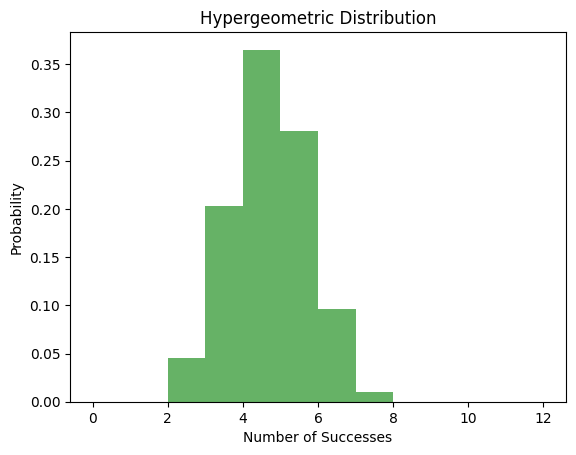

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Parameters: N=total population
#K=total success states,n=number as draws

N,K,n=20,7,12
data=np.random.hypergeometric(K,N-K,n,1000)

plt.hist(data,bins=range(n+1),density=True,alpha=0.6,color='g')
plt.title('Hypergeometric Distribution')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.show()

**Geometric Distribution**

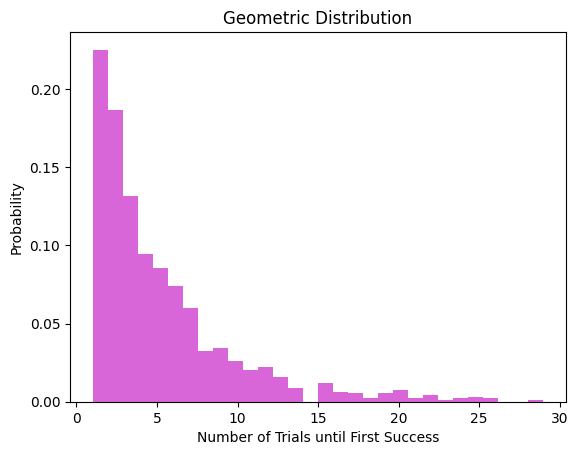

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Parameter:p=probability of success
p=0.2
data=np.random.geometric(p,1000)

plt.hist(data,bins=30,density=True,alpha=0.6,color='m')
plt.title('Geometric Distribution')
plt.xlabel('Number of Trials until First Success')
plt.ylabel('Probability')
plt.show()